<a href="https://colab.research.google.com/github/dg154/Customer-Segmentation-Analysis/blob/main/Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [23]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.shape

(200, 5)

In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [27]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [29]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<ipython-input-30-409fa44d1bb1>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=15)
<ipython-input-30-409fa44d1bb1>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=15)
<ipython-input-30-409fa44d1bb1>:7: UserWarning: 

`distplot` is a deprecated function and will be remo

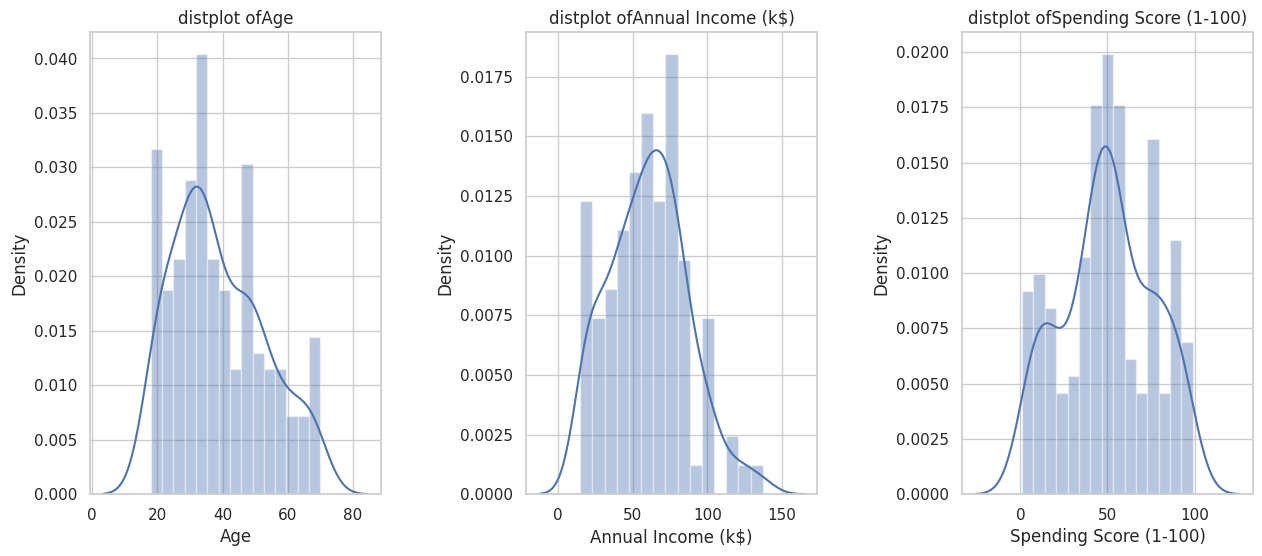

In [30]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace=0.5 , wspace=0.5)
  sns.distplot(df[x], bins=15)
  plt.title('distplot of{}'.format(x))
plt.show()

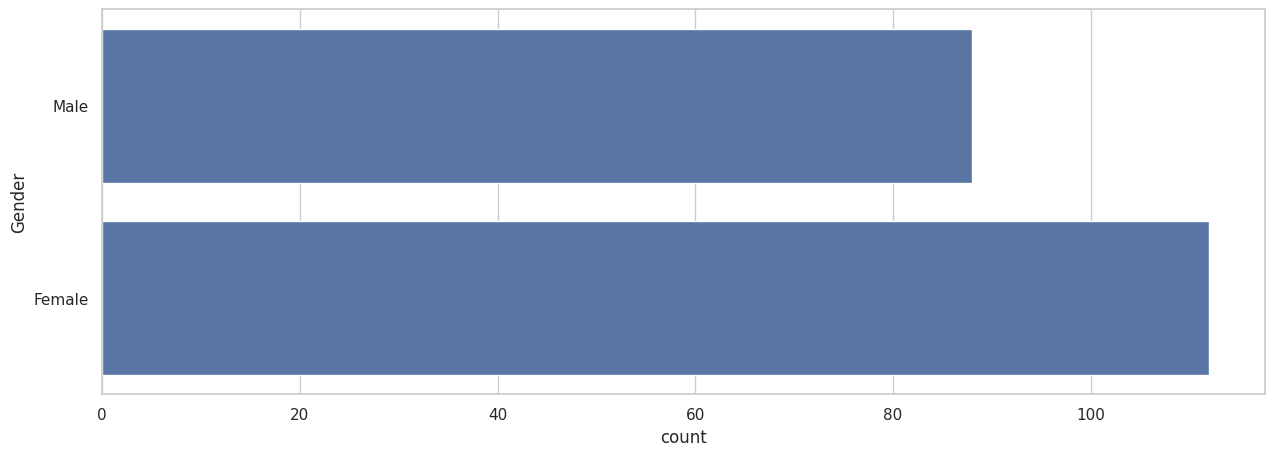

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=df)
plt.show()

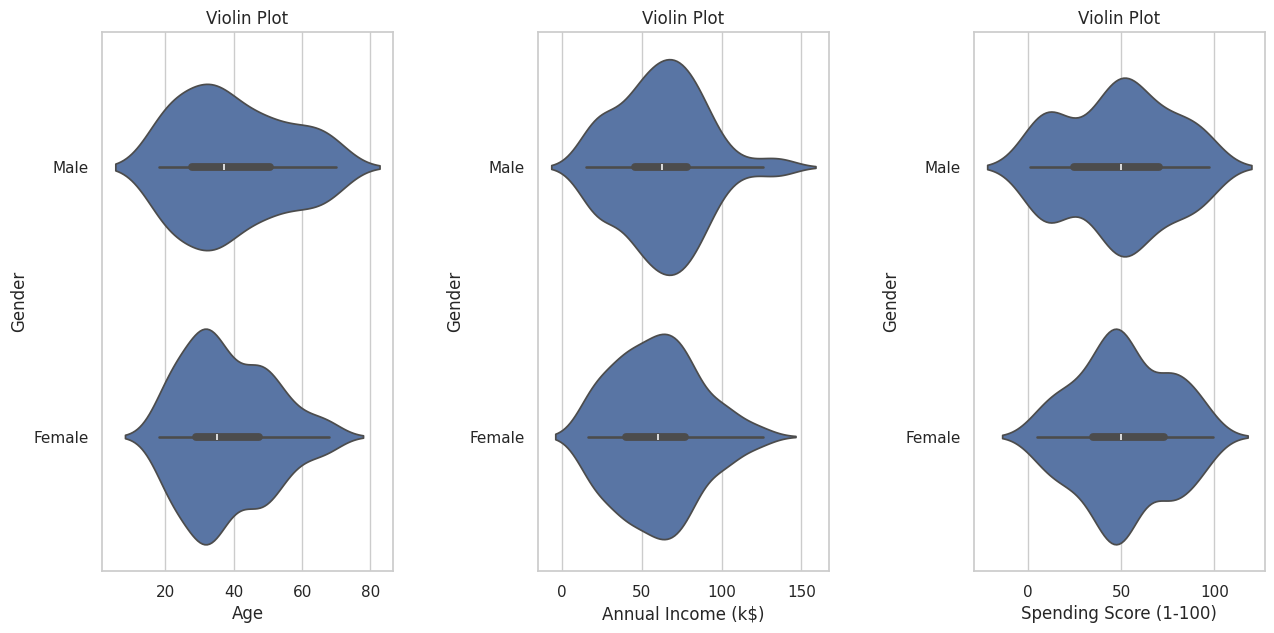

In [32]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x=cols , y='Gender', data=df)
    plt.ylebel=('Gender' if n == 1 else '' )
    plt.title('Violin Plot')
plt.show()

<ipython-input-33-803f480fc938>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex, y=agey, palette="YlGnBu_r")


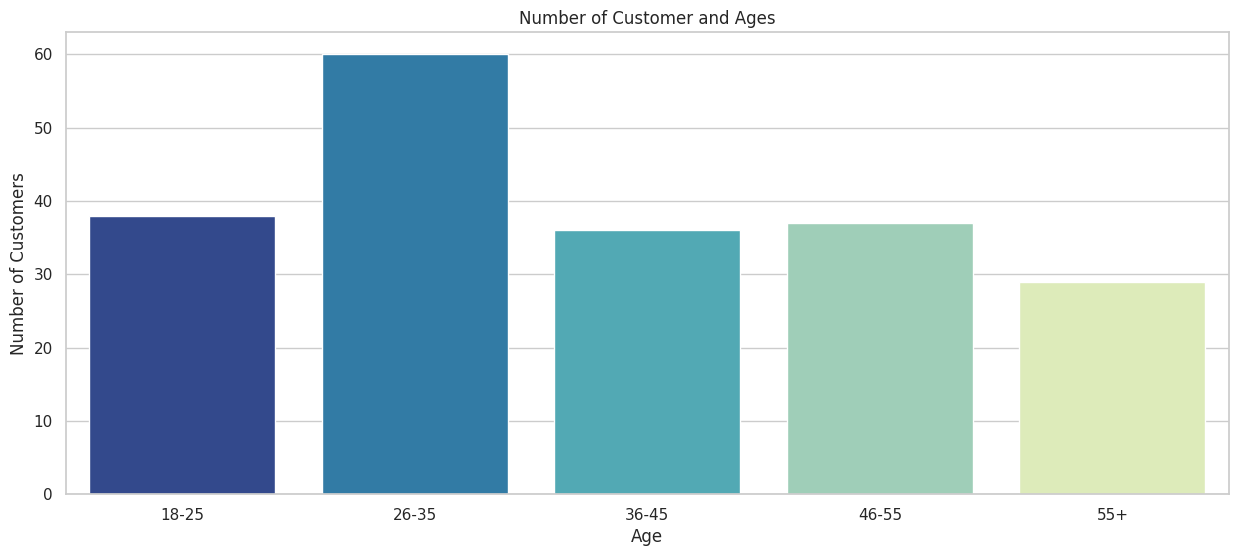

In [33]:
age_18_25=df.Age[(df.Age>=18) & (df.Age<=25)]
age_26_35=df.Age[(df.Age>=26) & (df.Age<=35)]
age_36_45=df.Age[(df.Age>=36) & (df.Age<=45)]
age_46_55=df.Age[(df.Age>=46) & (df.Age<=55)]
age_55above = df.Age[(df.Age>=56)]
agex=["18-25", "26-35", "36-45", "46-55", "55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="YlGnBu_r")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

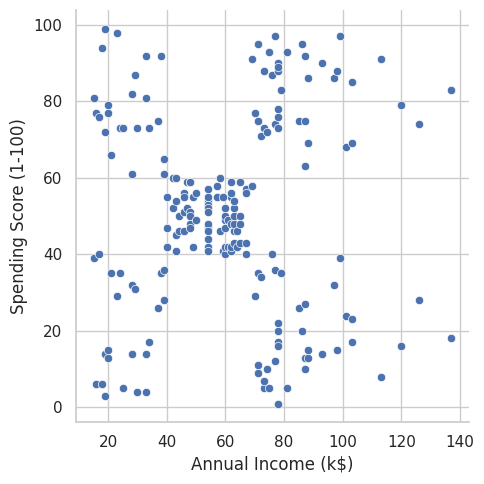

In [34]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

<ipython-input-35-f57137446c82>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy, palette="GnBu_r")


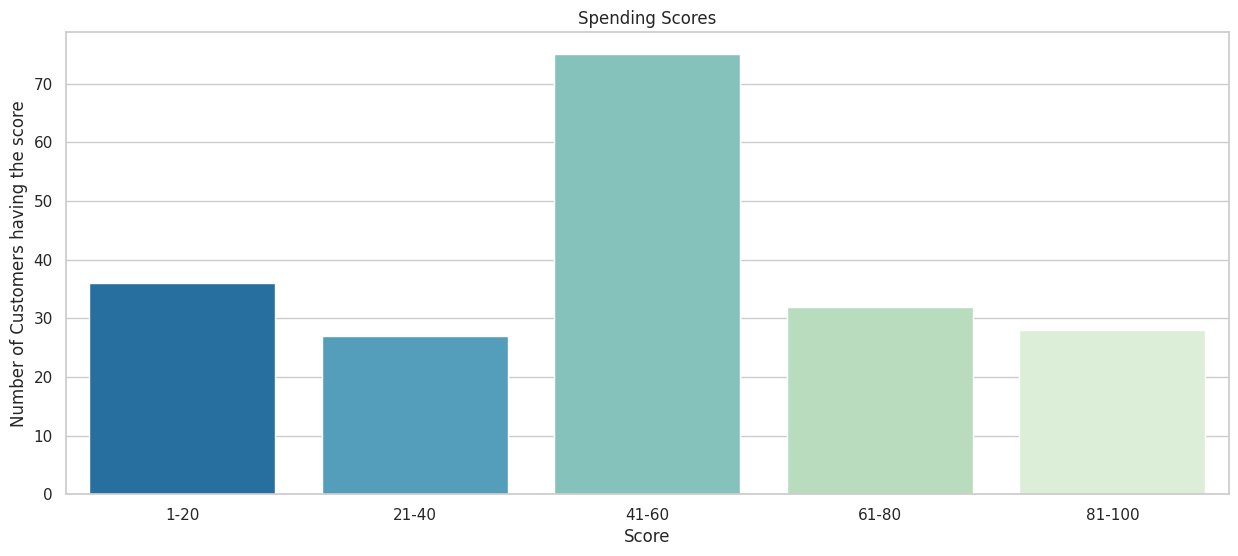

In [35]:
ss_1_20=df["Spending Score (1-100)"] [(df["Spending Score (1-100)"]>=1) & (df["Spending Score (1-100)"]<=20)]
ss_21_40=df["Spending Score (1-100)"] [(df["Spending Score (1-100)"]>=21) & (df["Spending Score (1-100)"]<=40)]
ss_41_60=df["Spending Score (1-100)"] [(df["Spending Score (1-100)"]>=41) & (df["Spending Score (1-100)"]<=60)]
ss_61_80=df["Spending Score (1-100)"] [(df["Spending Score (1-100)"]>=61) & (df["Spending Score (1-100)"]<=80)]
ss_81_100=df["Spending Score (1-100)"] [(df["Spending Score (1-100)"]>81) & (df["Spending Score (1-100)"]<=100)]

ssx= ["1-20","21-40","41-60","61-80","81-100"]
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="GnBu_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers having the score")
plt.show()

<ipython-input-36-d4e4f91e93d6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix,y=aiy,palette="mako")


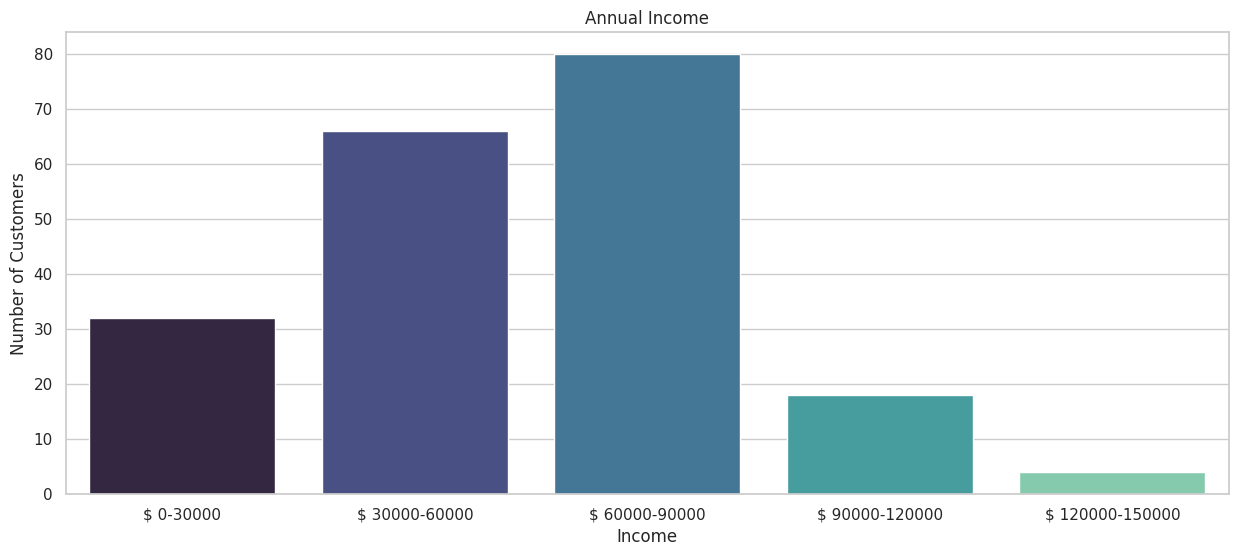

In [36]:
ai_0_30= df["Annual Income (k$)"][(df["Annual Income (k$)"]>=0) & (df["Annual Income (k$)"]<=30)]
ai_31_60= df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31) & (df["Annual Income (k$)"]<=60)]
ai_61_90= df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61) & (df["Annual Income (k$)"]<=90)]
ai_91_120= df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91) & (df["Annual Income (k$)"]<=120)]
ai_121_150= df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121) & (df["Annual Income (k$)"]<=150)]

aix=["$ 0-30000", "$ 30000-60000", "$ 60000-90000" , "$ 90000-120000", "$ 120000-150000"]
aiy= [len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix,y=aiy,palette="mako")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

In [37]:
# finding WCSS values for different number of clusters
x1= df.loc[:, ["Age","Spending Score (1-100)" ]].values
wcss = []

for i in range(1,11):
    # 1 and 11 will be excluded
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

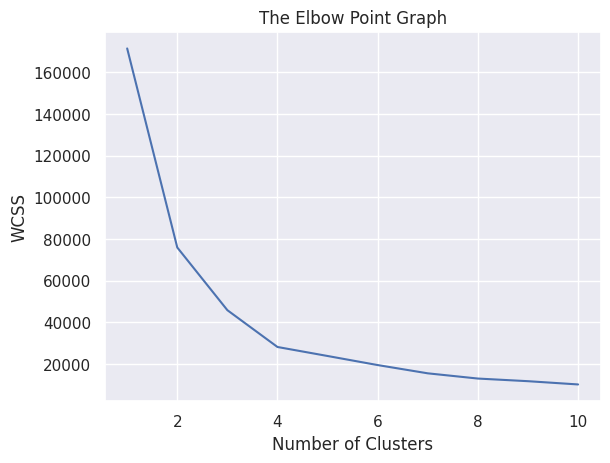

In [38]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [39]:
Kmeans=KMeans(n_clusters=4)
label=Kmeans.fit_predict(x1)
print(label)

[1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 1 1 3 2 1 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3
 2 3 2 0 2 0 1 3 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 2 1 2 0 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 0 2
 3 2 3 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
print(Kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]]


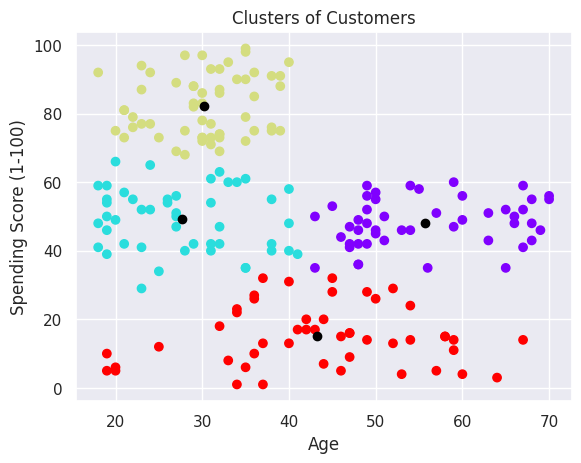

In [41]:
plt.scatter(x1[:,0],x1[:,1],c=Kmeans.labels_, cmap='rainbow')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],color="black")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [42]:
# finding WCSS values for different number of clusters
x2= df.loc[:, ["Annual Income (k$)","Spending Score (1-100)" ]].values
wcss = []

for i in range(1,11):
    # 1 and 11 will be excluded
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

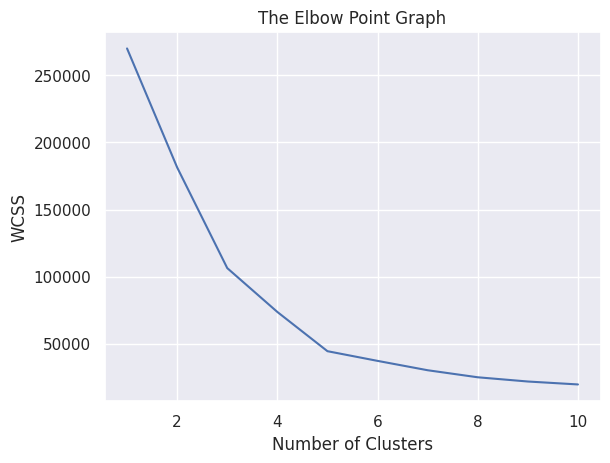

In [43]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [44]:
Kmeans=KMeans(n_clusters=5)
label=Kmeans.fit_predict(x2)
print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
print(Kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


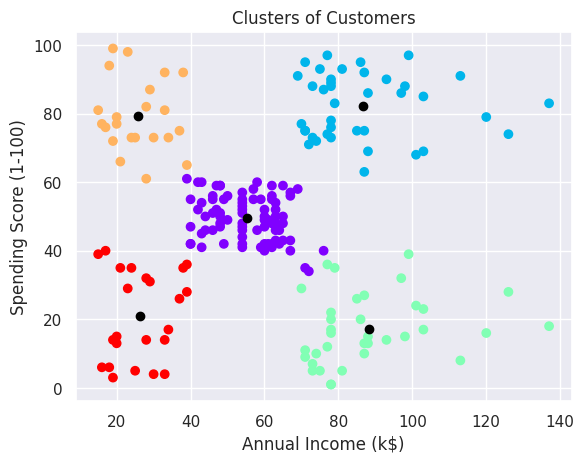

In [46]:
plt.scatter(x2[:,0],x2[:,1],c=Kmeans.labels_, cmap='rainbow')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],color="black")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [47]:
x3= df.iloc[:,1:]
wcss = []

for i in range(1,11):
    # 1 and 11 will be excluded
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

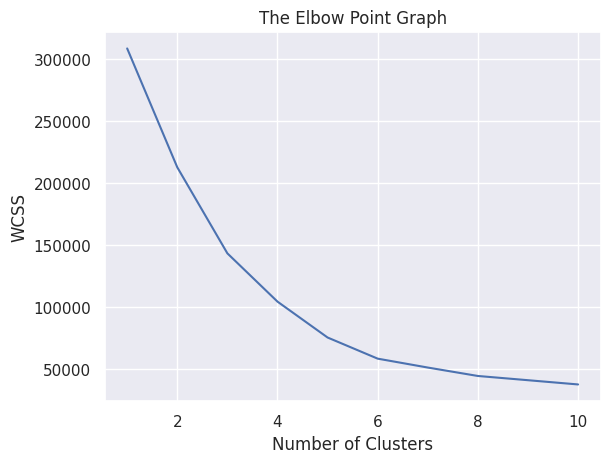

In [48]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [49]:
Kmeans=KMeans(n_clusters=5)
label=Kmeans.fit_predict(x3)
print(label)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 4 0 1 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 1 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
print(Kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]
 [45.2173913  26.30434783 20.91304348]
 [40.66666667 87.75       17.58333333]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


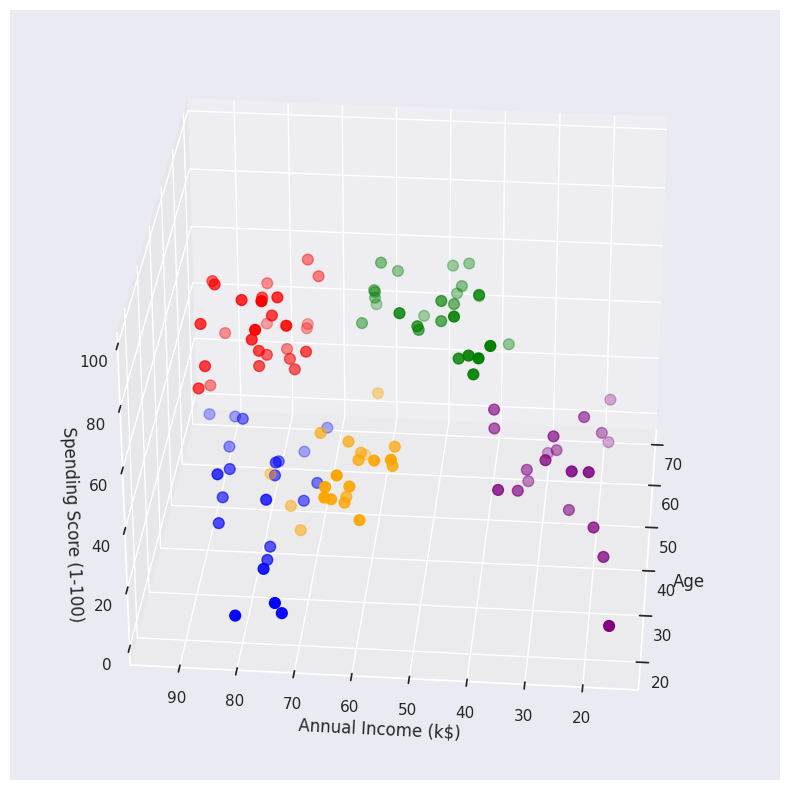

In [53]:
clusters = kmeans.fit_predict(x3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()